### Importing of modules and packages

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Assigning current 'Weekly-covid-admissions-and-bed-publication' to the variable 'current_covid_admissions' so data be updated weekly as new data becomes available

In [59]:
current_covid_admissions ='/Users/ivan/Desktop/PycharmProjects/Data_Science_Mini/Data/raw/Weekly-covid-admissions-and-beds-publication-201203'

### Extracting last date from 'All beds COVID' sheet (although any could have been used) and assigning it to variable last_day

In [60]:
df = pd.read_excel(r'%s.xlsx' % current_covid_admissions,
                   sheet_name='All beds COVID',
                   engine='openpyxl')
last_index = df.iloc[13].last_valid_index()

# convert datetime to date in format
last_day = df.iloc[13][last_index].strftime('%m/%d/%Y')

 ## Reading in summary data from 'All beds COVID' sheet

In [61]:
list_of_regions = ['East of England','London', 'Midlands','North East and Yorkshire',
                   'North West', 'South East', 'South West']
columns_to_drop = ['Type 1 Acute?', 'NHS England Region', 'Code']

df_all_beds = pd.read_excel(r'%s.xlsx' % current_covid_admissions,
                            sheet_name='All beds COVID',
                            header=14,
                            engine='openpyxl')
df_all_beds = df_all_beds.loc[df_all_beds['Name'].isin(list_of_regions)]
df_all_beds = df_all_beds.drop(columns=columns_to_drop)
df_all_beds = df_all_beds.reset_index(drop=True)
df_all_beds

,Name,2020-08-01 00:00:00,2020-08-02 00:00:00,2020-08-03 00:00:00,2020-08-04 00:00:00,2020-08-05 00:00:00,2020-08-06 00:00:00,2020-08-07 00:00:00,2020-08-08 00:00:00,2020-08-09 00:00:00,...,2020-11-22 00:00:00,2020-11-23 00:00:00,2020-11-24 00:00:00,2020-11-25 00:00:00,2020-11-26 00:00:00,2020-11-27 00:00:00,2020-11-28 00:00:00,2020-11-29 00:00:00,2020-11-30 00:00:00,2020-12-01 00:00:00
0,East of England,85.0,80.0,73.0,69.0,70.0,72.0,60.0,59.0,59.0,...,902.0,956.0,977.0,957.0,969.0,969.0,961.0,948.0,991.0,997.0
1,London,126.0,120.0,122.0,118.0,111.0,113.0,105.0,126.0,107.0,...,1605.0,1675.0,1626.0,1611.0,1643.0,1674.0,1635.0,1663.0,1677.0,1701.0
2,Midlands,216.0,194.0,206.0,182.0,181.0,179.0,178.0,96.0,101.0,...,3401.0,3414.0,3406.0,3378.0,3245.0,3203.0,3079.0,3120.0,3130.0,3084.0
3,North East and Yorkshire,117.0,120.0,115.0,123.0,128.0,132.0,111.0,117.0,117.0,...,3353.0,3437.0,3245.0,3137.0,3030.0,2932.0,2859.0,2862.0,2876.0,2814.0
4,North West,191.0,188.0,181.0,181.0,183.0,160.0,160.0,154.0,136.0,...,2794.0,2810.0,2811.0,2700.0,2607.0,2551.0,2355.0,2510.0,2572.0,2517.0
5,South East,123.0,122.0,122.0,111.0,106.0,78.0,77.0,80.0,72.0,...,1313.0,1395.0,1403.0,1437.0,1397.0,1429.0,1420.0,1430.0,1494.0,1423.0
6,South West,21.0,23.0,23.0,23.0,26.0,22.0,20.0,18.0,19.0,...,986.0,1025.0,1038.0,1020.0,1017.0,996.0,899.0,988.0,1016.0,971.0


 ### Changing column headings to dates

In [62]:
datelist = pd.date_range(start='08/01/2020', end=last_day).strftime('%d-%m-%Y')
i = 0
for col in df_all_beds.columns[1:len(datelist)+2]:
    df_all_beds.rename(columns={col:datelist[i]}, inplace=True)
    i += 1

df_all_beds

,Name,01-08-2020,02-08-2020,03-08-2020,04-08-2020,05-08-2020,06-08-2020,07-08-2020,08-08-2020,09-08-2020,...,22-11-2020,23-11-2020,24-11-2020,25-11-2020,26-11-2020,27-11-2020,28-11-2020,29-11-2020,30-11-2020,01-12-2020
0,East of England,85.0,80.0,73.0,69.0,70.0,72.0,60.0,59.0,59.0,...,902.0,956.0,977.0,957.0,969.0,969.0,961.0,948.0,991.0,997.0
1,London,126.0,120.0,122.0,118.0,111.0,113.0,105.0,126.0,107.0,...,1605.0,1675.0,1626.0,1611.0,1643.0,1674.0,1635.0,1663.0,1677.0,1701.0
2,Midlands,216.0,194.0,206.0,182.0,181.0,179.0,178.0,96.0,101.0,...,3401.0,3414.0,3406.0,3378.0,3245.0,3203.0,3079.0,3120.0,3130.0,3084.0
3,North East and Yorkshire,117.0,120.0,115.0,123.0,128.0,132.0,111.0,117.0,117.0,...,3353.0,3437.0,3245.0,3137.0,3030.0,2932.0,2859.0,2862.0,2876.0,2814.0
4,North West,191.0,188.0,181.0,181.0,183.0,160.0,160.0,154.0,136.0,...,2794.0,2810.0,2811.0,2700.0,2607.0,2551.0,2355.0,2510.0,2572.0,2517.0
5,South East,123.0,122.0,122.0,111.0,106.0,78.0,77.0,80.0,72.0,...,1313.0,1395.0,1403.0,1437.0,1397.0,1429.0,1420.0,1430.0,1494.0,1423.0
6,South West,21.0,23.0,23.0,23.0,26.0,22.0,20.0,18.0,19.0,...,986.0,1025.0,1038.0,1020.0,1017.0,996.0,899.0,988.0,1016.0,971.0


 ## Reading in summary data from 'MV beds COVID' sheet

In [63]:
df_MV = pd.read_excel(r'%s.xlsx' % current_covid_admissions,
                            sheet_name='MV beds COVID',
                            header=14,
                      engine='openpyxl')
df_MV = df_MV.loc[df_MV['Name'].isin(list_of_regions)]
df_MV = df_MV.drop(columns=columns_to_drop)
df_MV = df_MV.reset_index(drop=True)
df_MV.head()

,Name,2020-08-01 00:00:00,2020-08-02 00:00:00,2020-08-03 00:00:00,2020-08-04 00:00:00,2020-08-05 00:00:00,2020-08-06 00:00:00,2020-08-07 00:00:00,2020-08-08 00:00:00,2020-08-09 00:00:00,...,2020-11-22 00:00:00,2020-11-23 00:00:00,2020-11-24 00:00:00,2020-11-25 00:00:00,2020-11-26 00:00:00,2020-11-27 00:00:00,2020-11-28 00:00:00,2020-11-29 00:00:00,2020-11-30 00:00:00,2020-12-01 00:00:00
0,East of England,9.0,9.0,8.0,8.0,8.0,9.0,9.0,11.0,9.0,...,77.0,88.0,83.0,79.0,86.0,82.0,86.0,91.0,86.0,86.0
1,London,16.0,15.0,17.0,15.0,13.0,11.0,10.0,10.0,12.0,...,248.0,252.0,253.0,261.0,251.0,267.0,248.0,260.0,253.0,259.0
2,Midlands,13.0,10.0,10.0,13.0,13.0,14.0,10.0,5.0,6.0,...,303.0,312.0,313.0,313.0,306.0,304.0,291.0,286.0,277.0,274.0
3,North East and Yorkshire,9.0,8.0,7.0,7.0,7.0,6.0,7.0,8.0,7.0,...,240.0,244.0,247.0,230.0,223.0,207.0,211.0,204.0,189.0,185.0
4,North West,15.0,15.0,13.0,13.0,13.0,13.0,13.0,14.0,14.0,...,233.0,234.0,229.0,228.0,221.0,203.0,191.0,198.0,199.0,194.0


In [64]:
i = 0
for col in df_MV.columns[1:len(datelist)+2]:
    df_MV.rename(columns={col:datelist[i]}, inplace=True)
    i += 1

df_MV

,Name,01-08-2020,02-08-2020,03-08-2020,04-08-2020,05-08-2020,06-08-2020,07-08-2020,08-08-2020,09-08-2020,...,22-11-2020,23-11-2020,24-11-2020,25-11-2020,26-11-2020,27-11-2020,28-11-2020,29-11-2020,30-11-2020,01-12-2020
0,East of England,9.0,9.0,8.0,8.0,8.0,9.0,9.0,11.0,9.0,...,77.0,88.0,83.0,79.0,86.0,82.0,86.0,91.0,86.0,86.0
1,London,16.0,15.0,17.0,15.0,13.0,11.0,10.0,10.0,12.0,...,248.0,252.0,253.0,261.0,251.0,267.0,248.0,260.0,253.0,259.0
2,Midlands,13.0,10.0,10.0,13.0,13.0,14.0,10.0,5.0,6.0,...,303.0,312.0,313.0,313.0,306.0,304.0,291.0,286.0,277.0,274.0
3,North East and Yorkshire,9.0,8.0,7.0,7.0,7.0,6.0,7.0,8.0,7.0,...,240.0,244.0,247.0,230.0,223.0,207.0,211.0,204.0,189.0,185.0
4,North West,15.0,15.0,13.0,13.0,13.0,13.0,13.0,14.0,14.0,...,233.0,234.0,229.0,228.0,221.0,203.0,191.0,198.0,199.0,194.0
5,South East,12.0,15.0,12.0,9.0,9.0,8.0,8.0,7.0,8.0,...,96.0,97.0,111.0,114.0,110.0,113.0,115.0,111.0,120.0,118.0
6,South West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.0,72.0,70.0,75.0,67.0,66.0,62.0,64.0,61.0,66.0


### Comparison of percentage of beds occupied by mechanical ventilation on two user defined days

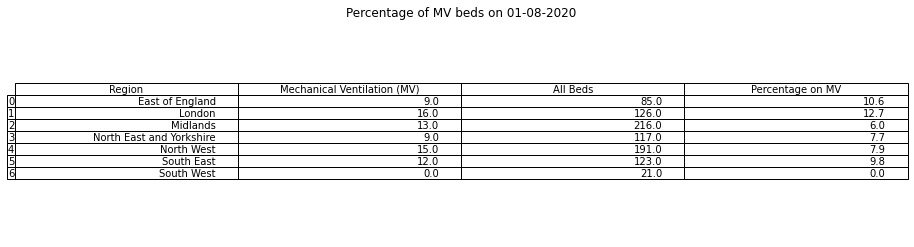

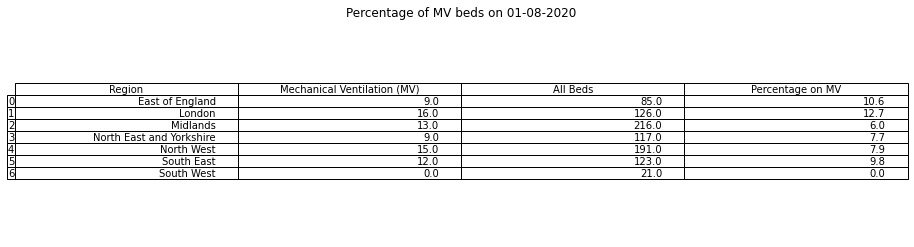

In [65]:

summary_df = pd.DataFrame(columns=['Region', 'Mechanical Ventilation (MV)',
                                   'All Beds', 'Percentage on MV'])

def mv_vs_all_beds(date):
    # assigning regions and values to summary_df
    summary_df['Region'] = df_MV['Name']
    summary_df['Mechanical Ventilation (MV)'] = df_MV[date_to_compare]
    summary_df['All Beds'] = df_all_beds[date_to_compare]
    summary_df['Percentage on MV'] =((summary_df['Mechanical Ventilation (MV)'] /summary_df['All Beds']) * 100).round(1)

    # Add title to summary_df
    fig = plt.figure(figsize = (16,4))
    ax = fig.add_subplot(111)
    ax.table(cellText = summary_df.values,
              rowLabels = summary_df.index,
              colLabels = summary_df.columns,
              loc = "center"
             )
    ax.set_title(f"Percentage of MV beds on {date_to_compare}")
    ax.axis("off")

date_to_compare = input("Please enter the first date you would like to compare (dd-mm-yyyy)")
mv_vs_all_beds(date_to_compare)

date_to_compare = input("Please enter the second date you would like to compare (dd-mm-yyyy)")
mv_vs_all_beds(date_to_compare)





### Scatter plot of all beds vs MV beds (offset MV beds from 1 to 7 days later)


1 days difference
The intercept: 37.20944732815292
The trained coefficient is: [0.0850195]

RMSE = 35.770886706030005
2 days difference
The intercept: 44.2701286435763
The trained coefficient is: [0.08538271]

RMSE = 36.814335460881786
3 days difference
The intercept: 50.59567833852134
The trained coefficient is: [0.08612072]

RMSE = 41.733441226239144
4 days difference
The intercept: 58.08320212413486
The trained coefficient is: [0.0867087]

RMSE = 49.942827286777295
5 days difference
The intercept: 64.8023144932842
The trained coefficient is: [0.08711343]

RMSE = 59.635355311970144
6 days difference
The intercept: 69.66248854418967
The trained coefficient is: [0.0886317]

RMSE = 69.55314895971668
7 days difference
The intercept: 77.26758333734023
The trained coefficient is: [0.08856081]

RMSE = 75.64113917379022
8 days difference
The intercept: 84.62995524246992
The trained coefficient is: [0.0898708]

RMSE = 79.07522752525048
9 days difference
The intercept: 89.90675345098043
The tr

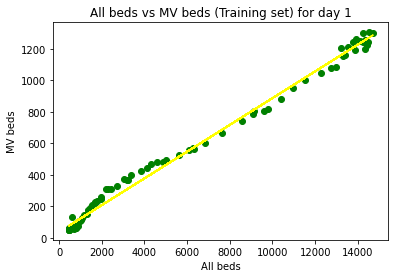

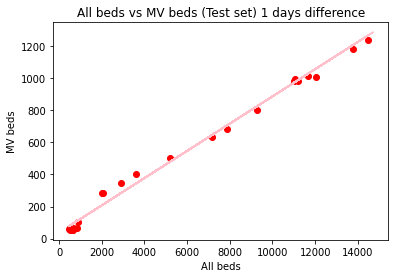

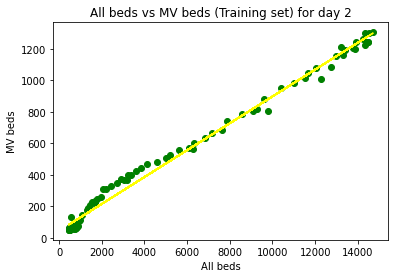

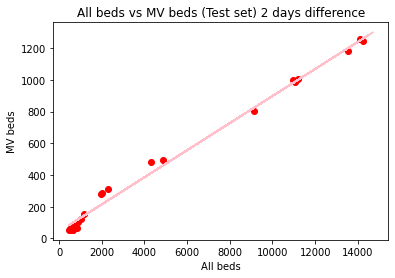

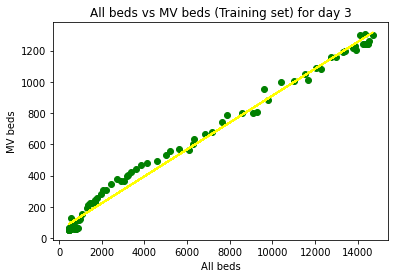

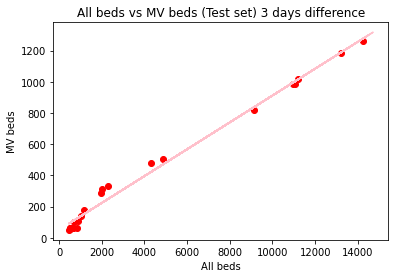

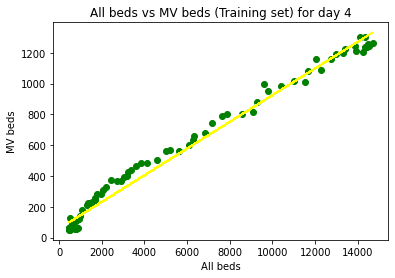

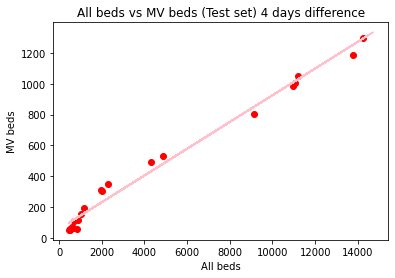

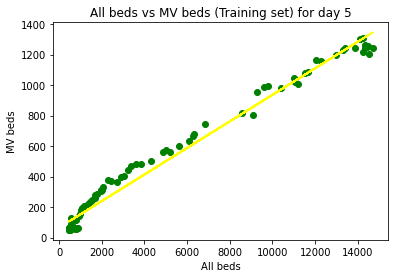

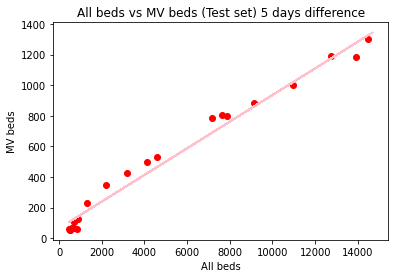

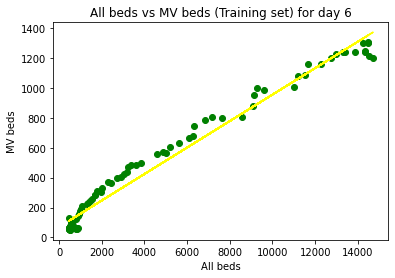

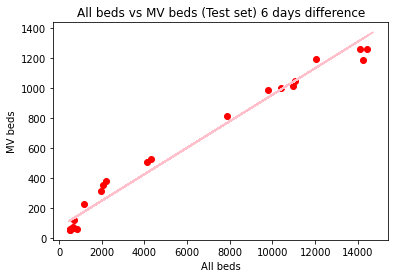

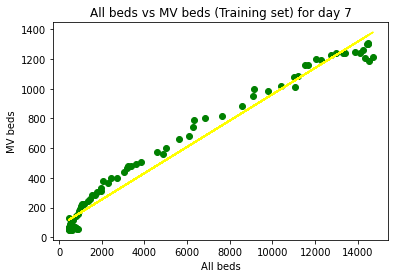

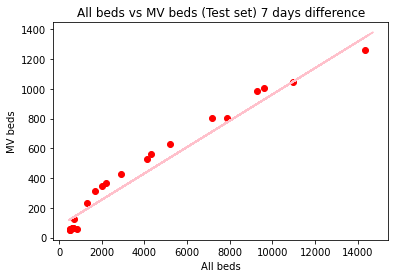

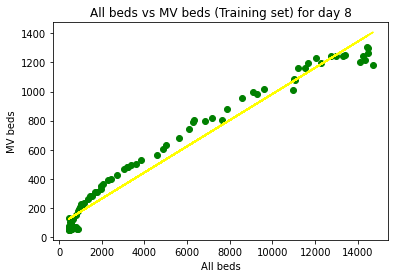

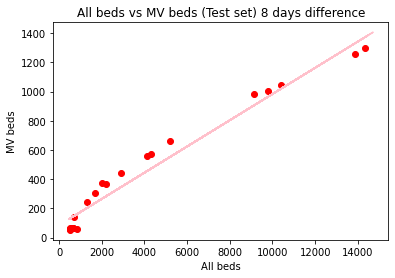

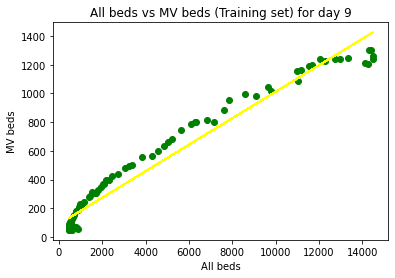

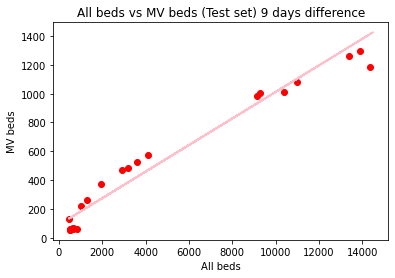

In [66]:
#extract total row from both 'All beds COVID' and 'MV beds COVID'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# initialise variable to hold the smallest RMSE over the 6 days and assume that occurs
# at day 0
smallest_RMSE = 1000
day = 1


for i in range(1,10):

    all_MV_beds = pd.read_excel(xlsx, 'MV beds COVID')
    all_beds_england = pd.read_excel(xlsx, 'All beds COVID')

    all_MV_beds = all_MV_beds.iloc[14][3+i:-1]
    all_beds_england = all_beds_england.iloc[14][4:-i]


    # need to reset the index here or NaNs will be introduced
    all_beds_vs_MV_beds = pd.concat([
        all_beds_england.reset_index(drop=True),
        all_MV_beds.reset_index(drop=True)],
        axis=1)
    all_beds_vs_MV_beds.columns = ['All Beds','MV Beds']

    # Linear Regression
    X = all_beds_vs_MV_beds.iloc[:,:-1]
    y = all_beds_vs_MV_beds.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


    # create an instance of the LinearRegression class
    ln1 = LinearRegression()

    # Train the regression model
    ln1.fit(X_train, y_train)

    # print the coefficients
    print(f"{i} days difference")
    print(f"The intercept: {ln1.intercept_}")
    print(f"The trained coefficient is: {ln1.coef_}")
    print()

    # predicting the test set
    y_pred = ln1.predict(X_test)

    # RSME (with sqaured=False)
    RMSE = metrics.mean_squared_error(y_pred, y_test, squared=False)
    print(f"RMSE = {RMSE}")
    if RMSE < smallest_RMSE:
        smallest_RMSE = RMSE
        day = i

    # Visualising the Training set results
    plt.scatter(X_train, y_train, color='green')
    plt.plot(X_train, ln1.predict(X_train), color='yellow')
    plt.title(f"All beds vs MV beds (Training set) for day {i}")
    plt.xlabel('All beds')
    plt.ylabel('MV beds')
    plt.show()

    # Visualising the Test set results
    plt.scatter(X_test, y_test, color='red')

    # don't replace anything here as regression line is based on testing set
    plt.plot(X_train, ln1.predict(X_train), color='pink')
    plt.title(f"All beds vs MV beds (Test set) {i} days difference")
    plt.xlabel('All beds')
    plt.ylabel('MV beds')
    plt.show()



In [67]:
print(f"The smallest RMSE is {smallest_RMSE.round(1)} from {day} difference")

The smallest RMSE is 35.8 from 1 difference


### Does the linear regression shows that after 1 day patients move onto a MV bed?

### Multiple Linear Regression
##### Independent variables 'All Beds' and 'Hospital Admissions and Diagnosis'
##### Dependent variable 'MV Beds'

In [68]:

# UPDATE!! 20
